### Plot regions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nilearn
from nilearn import image, plotting
from nilearn.image import threshold_img
from nilearn.regions import connected_regions


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


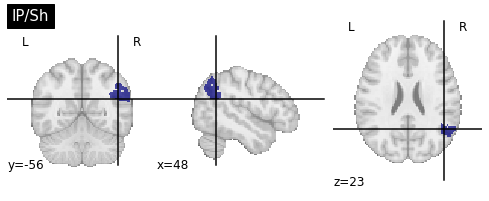

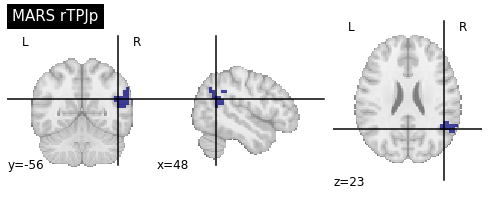

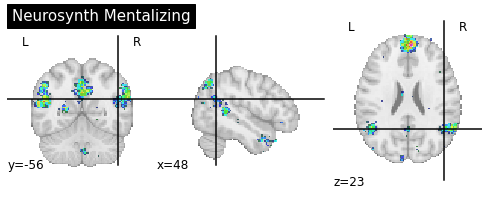

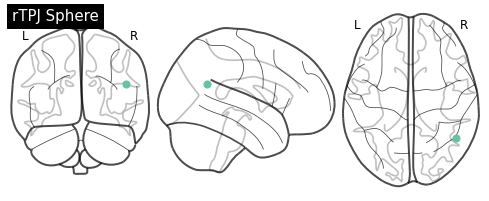

In [2]:
plot_coordinates = [48, -56, 23]

list_regions = ['../data/maps/rtpj_shen.nii',
                '../data/maps/mars_tpj_p_resampledtofunctional.nii',
                '../data/maps/pFgA_mentali_z_FDR_0.01.nii']

name_regions = ['IP/Sh',
                'MARS rTPJp',
                'Neurosynth Mentalizing']

for region_map, region_title in zip(list_regions, name_regions):
     nilearn.plotting.plot_roi(region_map, cut_coords = plot_coordinates, title = region_title)

networks_coords = [  (48,-56,23) ]   #MENT/DMN - rTPJ
n_nodes = len(networks_coords)
plotting.plot_connectome(np.zeros((n_nodes,n_nodes)), networks_coords, title = 'rTPJ Sphere');

### Plot Shen Parcellation

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:1332: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


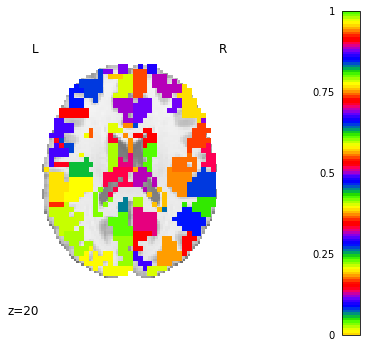

In [16]:
shen_file = '../data/maps/shen_2mm_268_parcellation.nii'
from nilearn import input_data, datasets

labels_masker = nilearn.input_data.NiftiLabelsMasker(shen_file, detrend = True, standardize = True,
                                                high_pass  = 0.01, t_r = 2.0, low_pass   = 0.12);
dataset = datasets.fetch_development_fmri();
n_subjs = len(dataset.func);
labels_masker.fit_transform(dataset.func[0]);
curr_isc = np.reshape(np.random.rand(268), (268,1)).T
curr_img = labels_masker.inverse_transform(curr_isc);

ax1 = plt.figure(figsize = (5,5))
nilearn.plotting.plot_stat_map(nilearn.image.index_img(curr_img,0), 
                                   #threshold = 0.05, 
                                   cmap = 'prism',
                                   display_mode = 'z',
                                   cut_coords = [ 20],
                                   annotate = True,
                              figure = ax1);
plt.show()


### Plot mentalizing networ filled

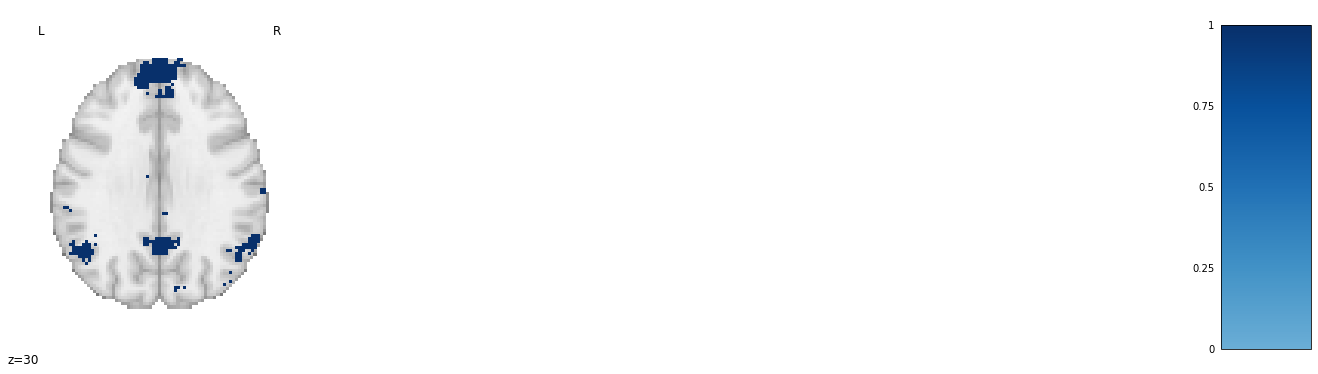

In [17]:
ax1 = plt.figure(figsize = (25,5))
mf = '../data/maps/mentalizing_fine.nii'

nilearn.plotting.plot_stat_map(mf, 
                                   cmap = 'Blues',
                                   display_mode = 'z',
                                   cut_coords = [30],
                                   annotate = True,
                              figure = ax1);
plt.show()

### Plot outlines of the network (for Figure 3)

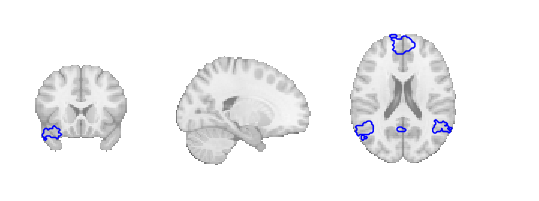

In [13]:
mf = '../data/maps/mentalizing_fine.nii'
display = nilearn.plotting.plot_stat_map(mf, threshold =20,
                                        annotate = False,
                                        draw_cross = False,
                                        cut_coords = [20,20,20])



threshold_percentile_img  = threshold_img(mf, threshold='50%', copy=False);
regions_percentile_img, index = connected_regions(threshold_percentile_img,min_region_size=5000);
mf2 = nilearn.image.mean_img(regions_percentile_img)
display.add_contours(mf2, levels=[0.5], colors='b')

#nilearn.plotting.plot_stat_map(mf, annotate = False, draw_cross = False, cut_coords = [20,20,20]);

### Plot single node

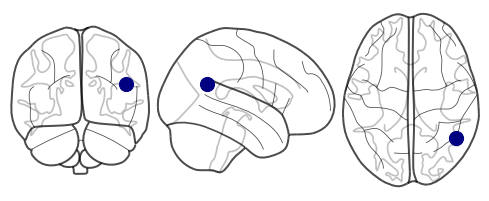

In [19]:
plotting.plot_connectome(np.zeros((1,1)),   
                         node_coords = [[48, -56, 23]], 
                         node_size = 200, 
                         node_color = 'navy',
                         annotate = False);